In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [5]:
df_train = pd.read_csv('D:/ML_Pyton_course/ML_Python/labs/datasets/titanic/train.csv')
df_test = pd.read_csv('D:/ML_Pyton_course/ML_Python/labs/datasets/titanic/test.csv')
df_train.head()
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.shape

(418, 11)

In [7]:
df_train.shape

(891, 12)

In [8]:

print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

### vizualize

In [9]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
def fill_nan_values(df):
    
    df["Embarked"] = df["Embarked"].fillna("S")
    df["Age"] = df["Age"].fillna(df["Age"].median())
    df["Cabin"] = df["Cabin"].fillna(0)
    #df["Fare"] = df["Fare"].fillna(df["Fare"].median())  # it is not null value why we need to put mean
    
    return df

In [13]:
df_train = fill_nan_values(df_train)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [15]:
def categories_to_numbers(df):
    if df['Sex'].dtype == "object":
        # male => 1, female => 0
        df["Sex"] = np.where(df["Sex"] == "male", 1,0) # what do np.where
        
    if df['Embarked'].dtype == "object":  
        ### this is just more-readable
        df.loc[df["Embarked"] == "S", "Embarked"] = 0
        df.loc[df["Embarked"] == "C", "Embarked"] = 1
        df.loc[df["Embarked"] == "Q", "Embarked"] = 2

        ### usefull, when we have more values
        # Get the unique values of Embarked
#         embarks = sorted(df['Embarked'].unique())

        # Generate a mapping of Embarked string to a numbers (0,1,...)    
#         embarks_map = dict(zip(embarks, range(0, len(embarks) + 1)))

        # Transform Embarked from a string to a number representation
#         df['Embarked'] = df['Embarked'].map(embarks_map).astype(int)
        
    print("df['Sex'].dtype", df['Sex'].dtype)
    print("df['Embarked'].dtype", df['Embarked'].dtype)

    return df

In [16]:
f_train = categories_to_numbers(df_train)

df_train.head()

df['Sex'].dtype int32
df['Embarked'].dtype int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0


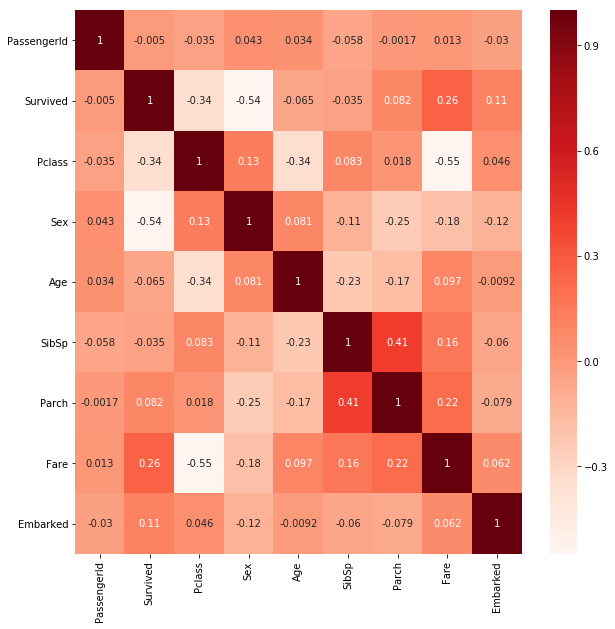

In [19]:
df_train_corr = df_train.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_train_corr,annot=True, cmap="Reds")

In [20]:
usefull_features = ['Sex', 'Pclass','Fare','Embarked','Survived'] # Why we choose this features, for sex we have -0.54 corr. 
                                                                  # How we choose the significant features 

df_train = df_train[ usefull_features ]
df_train.shape

(891, 5)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df_train.drop('Survived',axis=1), # what do .drop
    df_train['Survived'], 
    random_state=42)

In [22]:
lg = LogisticRegression()
fitted = lg.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [23]:
print(fitted.intercept_)
print(fitted.coef_)

[2.38735705]
[[-2.37322124 -0.72083711  0.00325131  0.29379166]]


In [24]:
y_pred = fitted.predict(X_test)

In [25]:
res = y_pred == y_test
true_count = res[res==True]
 # ще бъде вярно само когато предсказаната стойност е еднаква на тестваната или истинската

print(f'Correct answers: {true_count.count()} out of {y_pred.size}')

Correct answers: 172 out of 223


In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       134
           1       0.72      0.71      0.71        89

   micro avg       0.77      0.77      0.77       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.77      0.77       223

